In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime

In [2]:


file_names = ["10.07.23.xlsx", "11.07.23.xlsx", "12.07.23.xlsx", "13.07.23.xlsx", "14.07.23.xlsx"]

all_data = pd.DataFrame()

for file in file_names:

    date_str = os.path.splitext(file)[0]
    date = datetime.datetime.strptime(date_str, "%d.%m.%y").date()
    

    data = pd.read_excel(file)
    

    data.set_index(pd.Index([date] * len(data)), inplace=True)

    all_data = pd.concat([all_data, data])




In [3]:
all_data['наличие'] = all_data['наличие'].replace(['Ожидает поступления', 'Под заказ', 'подзаказ','ожидаетпоступления','Нет в наличии'], np.nan)
all_data

,артикул,наименование,цена,наличие
2023-07-10,215-1516,Насос повысительный OG 15/9-160 PN10 1х220В/50...,3790.9,973.0
2023-07-10,215-1517,Насос повысительный OG 20/12-195 PN10 1х220В/5...,6426.4,301.0
2023-07-10,215-1510,Насос циркуляционный с мокрым ротором OG 25/4-...,2691.4,1232.0
2023-07-10,215-1511,Насос циркуляционный с мокрым ротором OG 25/6-...,2964.1,1870.0
2023-07-10,215-1512,Насос циркуляционный с мокрым ротором OG 25/8-...,5326.6,470.0
...,...,...,...,...
2023-07-14,107-3666,Кран шаровой латунь газ 11б27п6 Ду 20 Ру16 ВР/...,359.9,NaN
2023-07-14,107-7621,Кран шаровой латунь никель Bugatti серия 322 Д...,2052.0,NaN
2023-07-14,107-7622,Кран шаровой латунь никель Itap серия 098S Ду ...,3079.0,NaN
2023-07-14,107-9428,Кран шаровой латунь никель 3-ход AMZ-113R Ду 2...,4896.1,NaN


In [4]:
all_data.index = pd.to_datetime(all_data.index)
grouped_data = all_data.groupby(['наименование', 'артикул']).resample('D')['наличие'].first().unstack()
grouped_data

,,2023-07-10,2023-07-11,2023-07-12,2023-07-13,2023-07-14
наименование,артикул,,,,,
Адаптер R453F для приводов R473/R478 Giacomini R453FY002,020-0284,NaN,NaN,NaN,NaN,NaN
Адаптер R453H клипс clip-clap для соединения эл/терм K470H Giacomini R453HY012,022-2099,NaN,NaN,NaN,NaN,NaN
Адаптер R453H клипс clip-clap для соединения эл/терм R468H Giacomini R453HY011,022-3246,60.0,60.0,60.0,60.0,60.0
Винт R454D для антивандальных оболочек R455C Giacomini R454DY001,013-2311,NaN,NaN,NaN,NaN,NaN
"Водонагреватель электрический 22 л 1,25 кВт ЭВБО над раковиной ЭлБЭТ",003-0160,NaN,7.0,16.0,16.0,25.0
...,...,...,...,...,...,...
"Элемент термостатический TR 84 жид/нап гайка М30х1,5 8-28oC Ридан 013G7084R",022-6750,291.0,291.0,291.0,291.0,289.0
"Элемент термостатический жид/нап гайка М30х1,5 0-28oC с выносным темп/датчиком L=2м Icma 82990AC20",022-5117,765.0,765.0,765.0,765.0,765.0
"Элемент термостатический жид/нап гайка М30х1,5 6-28oC Ogint",022-5069,107337.0,107328.0,107324.0,107324.0,106825.0


In [5]:
grouped_data = grouped_data.dropna(subset=grouped_data.columns[2:], how='any')


In [ ]:
data = grouped_data.copy()

data['реализация'] = 0
data['пополнение'] = 0

for idx, row in data.iterrows():
    realization = 0
    replenishment = 0
    
    
    prev_value = next((value for value in row.iloc[:-2] if pd.notnull(value)), None)
    
    if prev_value is None:
        continue  
    
    for value in row.iloc[:-2]: 
        if pd.notnull(value):
            if value > prev_value:
                replenishment += (value - prev_value)  
                prev_value = value
            else:
                realization += (prev_value - value) 
                prev_value = value
    
    data.at[idx, 'реализация'] = realization
    data.at[idx, 'пополнение'] = replenishment


data

# Отсортированная реализация

In [12]:
data_realization = data.sort_values(by='реализация', ascending=False)
data_realization.head(20)

,,2023-07-10 00:00:00,2023-07-11 00:00:00,2023-07-12 00:00:00,2023-07-13 00:00:00,2023-07-14 00:00:00,реализация,пополнение
наименование,артикул,,,,,,,
Кран шаровой латунь никель Pride Ду 15 Ру40 ВР/НР полнопроходной бабочка аналог 11б27п1 LD 47.15.В-Н.Б,007-9922,25385.0,22853.0,20909.0,20909.0,19572.0,5813,0
Радиатор биметаллический Ultra Plus 500 10 секций Qну=1430 Вт RAL 9016 (белый) Ogint .,117-5978,8341.0,8293.0,8282.0,8282.0,3735.0,4606,0
Комплект для бок/п радиатора термостатический R470F жид/нап для двухтр Ду 15 Ру10 угловой клипс clip-clap 8-32oC штуцер с герметичной прокладкой Giacomini R470FX003,022-0764,8659.0,8659.0,8655.0,8655.0,5765.0,2894,0
Кран шаровой латунь никель Pride Ду 15 Ру40 ВР полнопроходной бабочка аналог 11б27п1 LD 47.15.В-В.Б,007-9920,28691.0,27831.0,26262.0,26262.0,25827.0,2864,0
Кран шаровой латунь Стандарт 220 аналог 11б27п1 Ду 15 Ру40 ВР полнопроходной рычаг ГАЛЛОП 107150,107-8602,19914.0,19683.0,18890.0,18890.0,17491.0,2423,0
Кран шаровой латунь никель Стандарт Ду 15 Ру40 ВР полнопроходной бабочка Dist Н311Б,107-9578,5206.0,4606.0,3016.0,3016.0,2808.0,2398,0
Кран шаровой латунь никель Pride Ду 15 Ру40 ВР полнопроходной рычаг аналог 11б27п1 LD 47.15.В-В.Р,007-9921,25133.0,23739.0,22782.0,22782.0,27256.0,2351,4474
Кран шаровой латунь никель 1002 Euro Ду 20 Ру30 ВР полнопроходной бабочка Aquasfera 1002-02,007-7379,5775.0,4835.0,3515.0,3515.0,10766.0,2260,7251
Кран шаровой латунь 11б27п1 Ду 20 Ру16 ВР рычаг SantechSystems .,107-9082,31976.0,31832.0,31587.0,31587.0,29915.0,2061,0


# Графики реализации. Первые 5

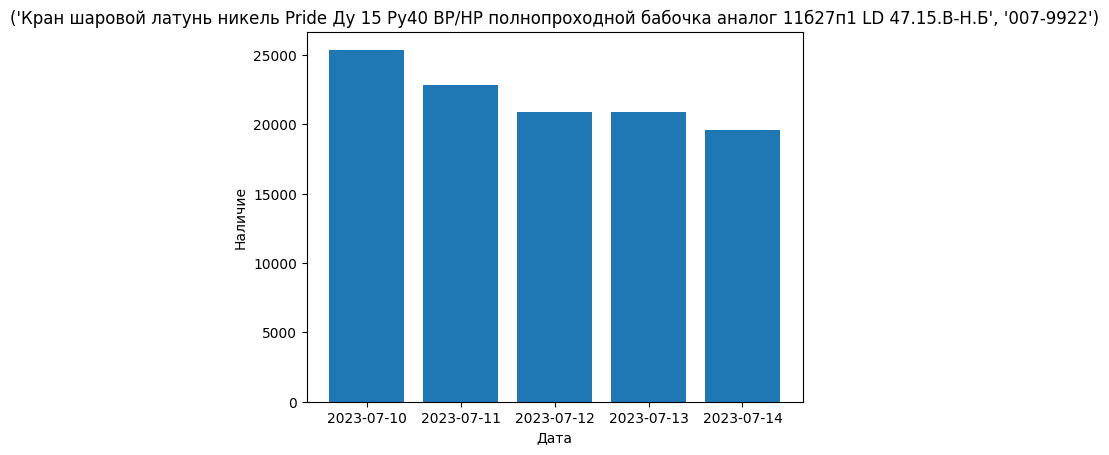

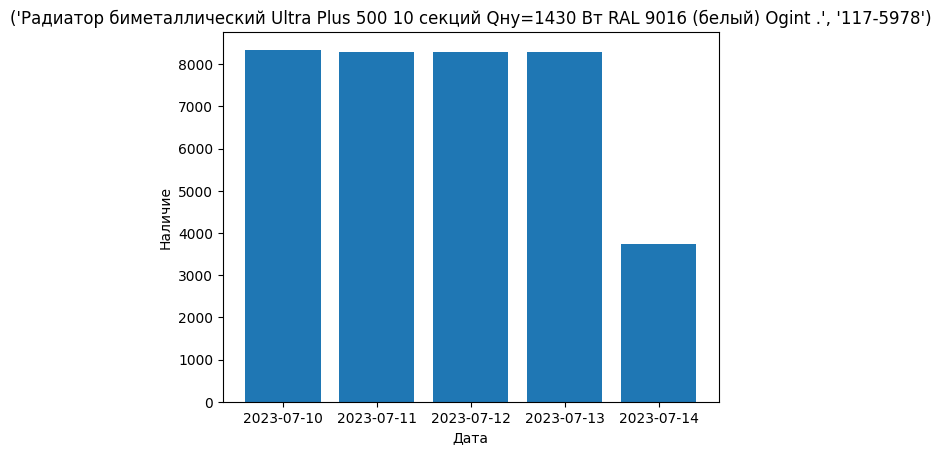

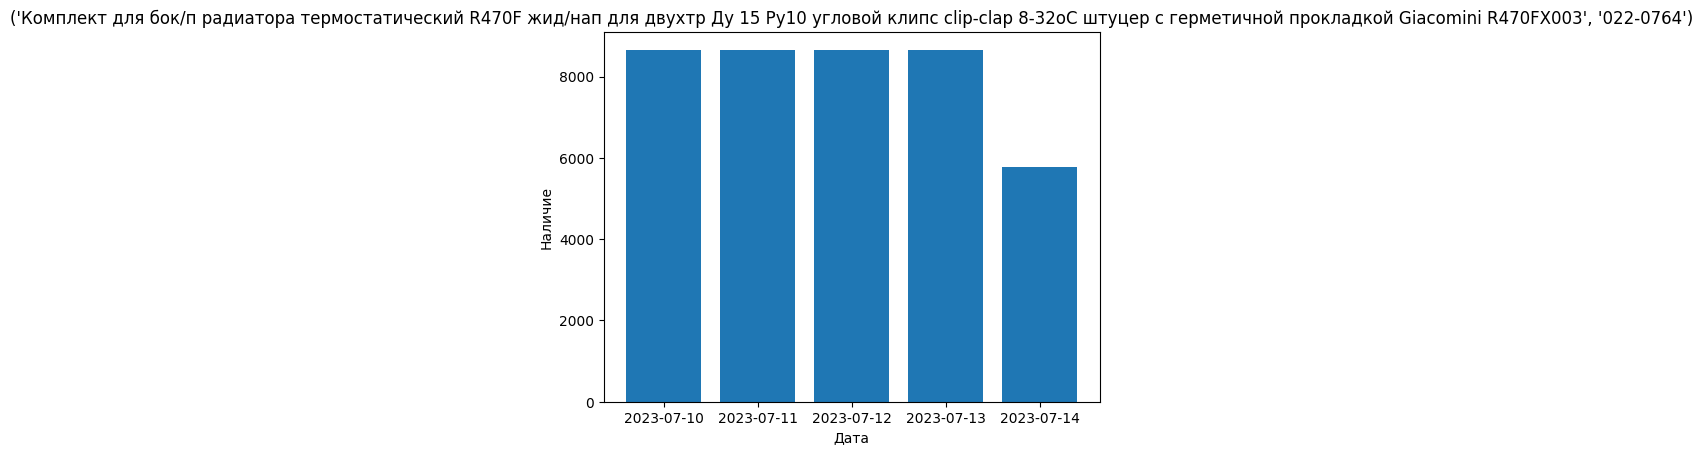

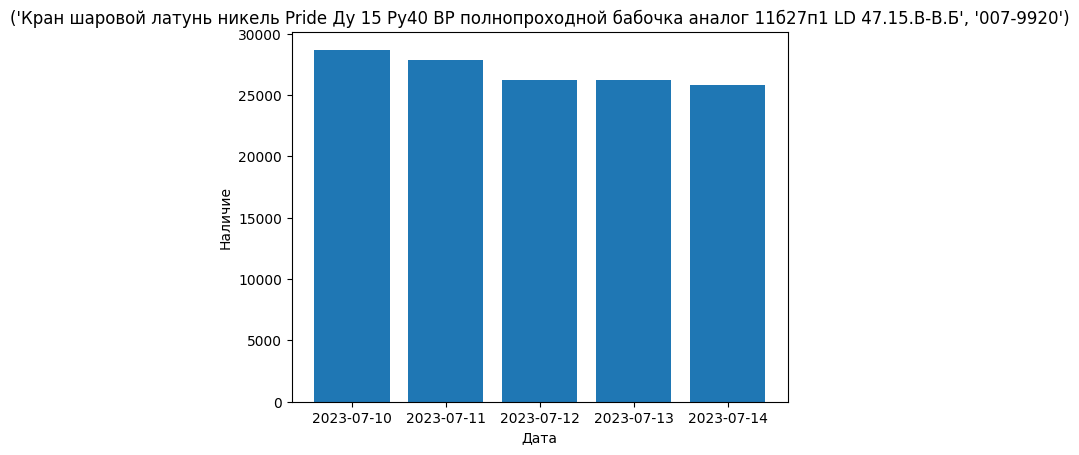

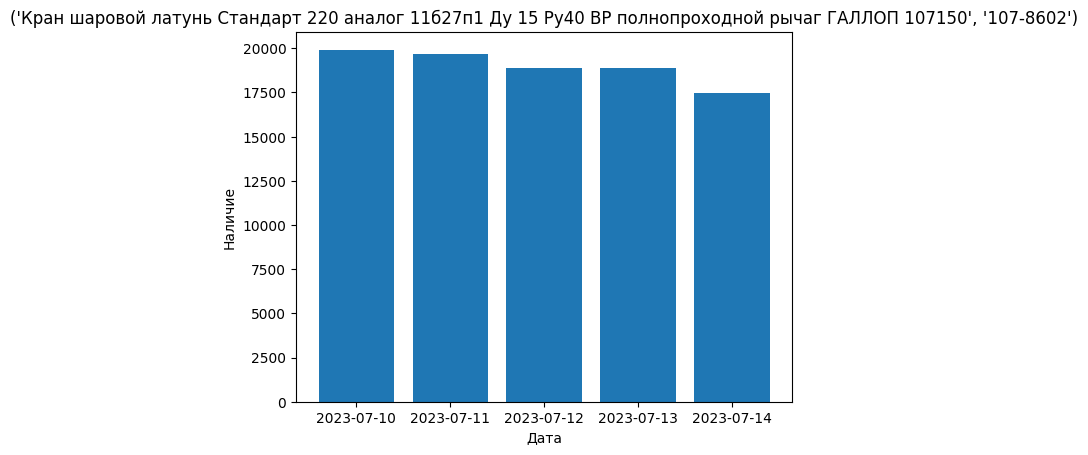

In [8]:
first_100_rows = data_realization.iloc[:5, :-2] 


for idx, row in first_100_rows.iterrows():
    plt.bar(row.index, row.values)
    plt.title(idx)
    plt.xlabel('Дата')
    plt.ylabel('Наличие')
    plt.show()
    

# Отсортированное пополнение

In [9]:
data_realization = data.sort_values(by='пополнение', ascending=False)
data_realization.head()

,,2023-07-10 00:00:00,2023-07-11 00:00:00,2023-07-12 00:00:00,2023-07-13 00:00:00,2023-07-14 00:00:00,реализация,пополнение
наименование,артикул,,,,,,,
Кран шаровой латунь хром R850 Ду 15 Ру35 ВР полнопроходной рычаг Giacomini R850X023,007-1308,17977.0,17970.0,17805.0,17805.0,33547.0,172,15742
"Кран шаровой латунь хром R859 Ду 15 Ру35 ВР/""американка"" полнопроходной бабочка Giacomini R859X323",107-4286,4063.0,4013.0,8013.0,8013.0,17984.0,50,13971
Кран шаровой латунь хром R851 Ду 15 Ру35 ВР полнопроходной бабочка Giacomini R851X023,007-1314,15307.0,15155.0,15155.0,15155.0,26723.0,152,11568
Кран шаровой латунь никель 1101 Standard Ду 20 Ру30 ВР полнопроходной рычаг Aquasfera 1101-02,107-5136,23930.0,23900.0,23811.0,23811.0,32770.0,119,8959
Кран шаровой латунь никель 1002 Euro Ду 20 Ру30 ВР полнопроходной бабочка Aquasfera 1002-02,007-7379,5775.0,4835.0,3515.0,3515.0,10766.0,2260,7251


# Графики пополнения. Первые 5

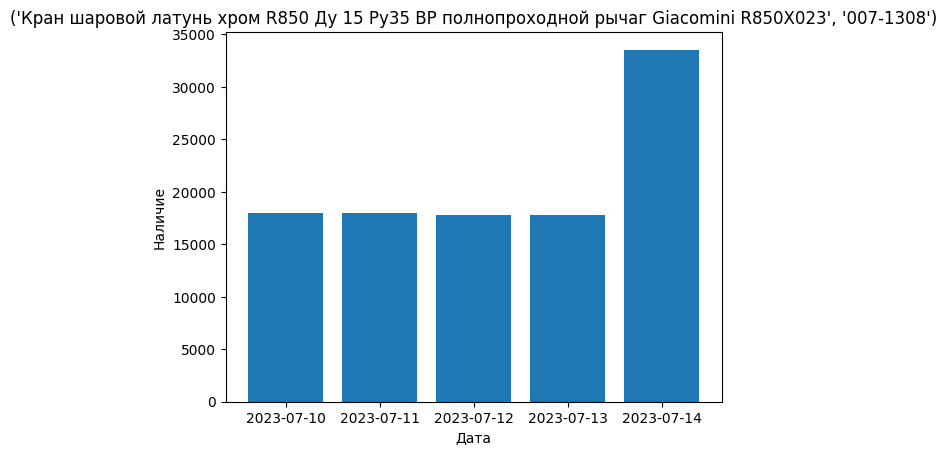

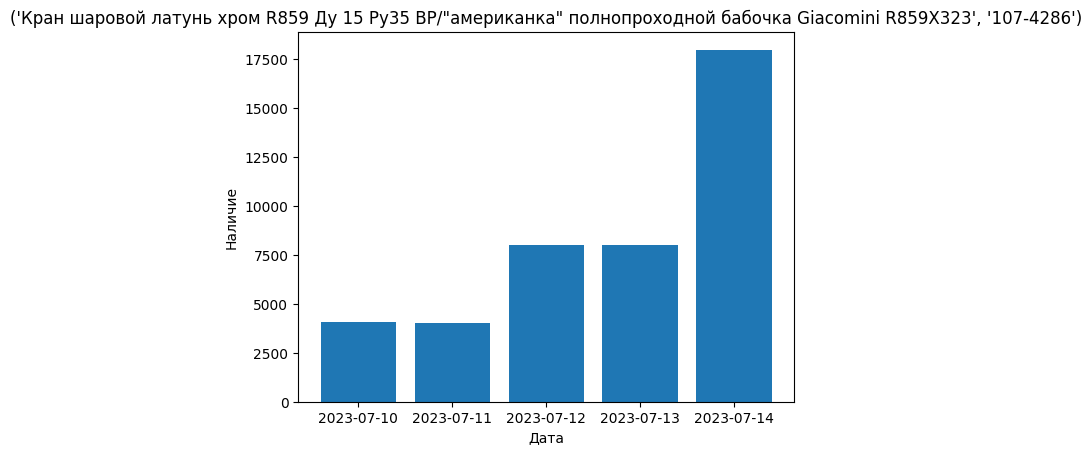

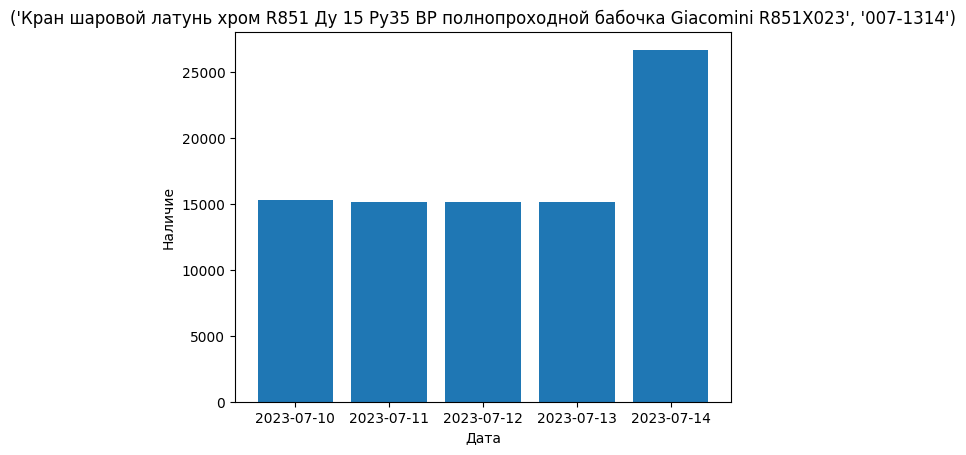

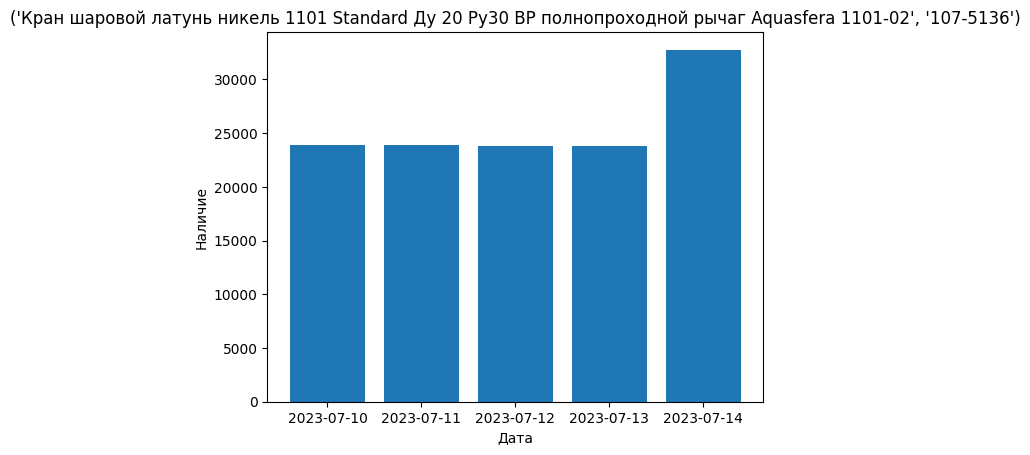

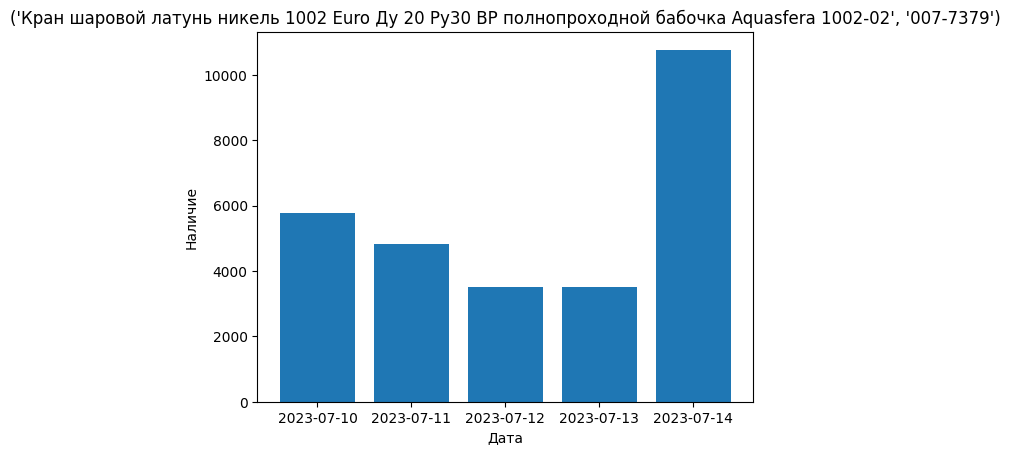

In [10]:
first_100_rows = data_realization.iloc[:5, :-2]


for idx, row in first_100_rows.iterrows():
    plt.bar(row.index, row.values)
    plt.title(idx)
    plt.xlabel('Дата')
    plt.ylabel('Наличие')
    plt.show()

In [11]:
data.to_excel('Сантехкомлект_с 10 по 14 июля.xlsx')